In [ ]:
pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.1/297.1 MB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 65.0 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.3
    Uninstalling numpy-1.26.3:
      Successfully uninstalled numpy-1.26.3
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import pandas as pd
import numpy as np
import xgboost as xgb
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.utils import to_categorical
from tensorflow.keras import regularizers
from sklearn.metrics import confusion_matrix,auc,roc_curve

/shared-libs/python3.10/py/lib/python3.10/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
2024-05-28 04:14:26.812422: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-28 04:14:27.732262: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2024-05-28 04:14:27.732334: W tensorflow/compiler/xla/stream_executor/platform/de

In [ ]:
df = pd.read_csv('/work/loan_approval_dataset.csv')
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [ ]:
from sklearn.preprocessing import LabelEncoder

print(df.columns)
df.rename(columns=lambda x: x.strip(), inplace=True)

s = (df.dtypes == "object")

object_cols = list(s[s].index)

label_encoder = LabelEncoder()
#kategori degerleri verileri sayısal degerlere dönüştürüyor
for i in object_cols:
    df[i] = label_encoder.fit_transform(df[i])



df.info()

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   loan_id                   4269 non-null   int64
 1   no_of_dependents          4269 non-null   int64
 2   education                 4269 non-null   int64
 3   self_employed             4269 non-null   int64
 4   income_annum              4269 non-null   int64
 5   loan_amount               4269 non-null   int64
 6   loan_term                 4269 non-null   int64
 7   cibil_score               4269 non-null   int64
 8   residential_assets_value  4269 non-null   int64
 9   commercia

In [ ]:
X = df.drop(['loan_status'],axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

y = df["loan_status"]

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

AllModels = [
    ("K-Nearest_Neighbors", KNeighborsClassifier()),
    ("Naive Bayes", GaussianNB()),
    ("LSVM", LinearSVC()),
    ("RBF SVM", SVC(kernel='rbf', gamma='scale')),
    ("Random Forest", RandomForestClassifier()), 
    ("XGBoost", XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')),
    ("Decision Tree",DecisionTreeClassifier()),
    ("MLP",MLPClassifier(hidden_layer_sizes=(20, ), max_iter=100, random_state=42))
]

In [ ]:
from sklearn.metrics import confusion_matrix
def confusion_matrix_values(y_true,y_pred):
    cm = confusion_matrix(y_true,y_pred)
    return(cm[0][0],cm[0][1],cm[1][0],cm[1][1],cm)

In [ ]:
def get_Accuracy(TruePositive,FalsePositive,FalseNegative,TrueNegative):
    return (TruePositive + TrueNegative) / (TruePositive + FalsePositive + FalseNegative + TrueNegative)

In [ ]:
def get_Precision(TruePositive,FalsePositive,FalseNegative,TrueNegative):
    return TruePositive / (TruePositive + FalsePositive)

In [ ]:
def get_Recall(TruePositive,FalsePositive,FalseNegative,TrueNegative):
    return TruePositive / (TruePositive + FalseNegative)

In [ ]:
def get_F1 (Precision,Recall):
    return 2 * ((Precision * Recall) / (Precision + Recall))

In [ ]:
from sklearn.model_selection import KFold

results = {"Model":[],"Fold":[],"F1 Score":[],"Precision":[],"Recall":[],"Accuracy":[],"CM":[]}

split = 10
kfold = KFold(n_splits=split, shuffle=True, random_state=42)

for model_name,model in AllModels:
    
    cnt=1
    for train_index, test_index in kfold.split(X_scaled, y):
      #Process
      print(f'Models:{model_name} Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
      
      X_train, X_test = X_scaled[train_index], X_scaled[test_index]
      y_train, y_test = y[train_index], y[test_index]
      
      #Train
      model.fit(X_train,y_train)
      y_pred = model.predict(X_test)

      #Get Confusion Matrix Value
      TP, FP, FN, TN, CM = confusion_matrix_values(y_test, y_pred)
 
      #Accuracy
      CalculatedAccuracy = get_Accuracy(TP,FP,FN,TN)
      
      #Precision
      CalculatedPrecision = get_Precision(TP,FP,FN,TN)

      #Recall
      CalculatedRecall = get_Recall(TP,FP,FN,TN)
      
      #Score
      CalculatedScore = get_F1(CalculatedPrecision,CalculatedRecall)
      
      #Add results
      results["Model"].append(model_name)
      results["Fold"].append(cnt)
      results["F1 Score"].append(CalculatedScore)
      results["Accuracy"].append(CalculatedAccuracy)
      results["Recall"].append(CalculatedRecall)
      results["Precision"].append(CalculatedPrecision)
      results["CM"].append(CM)
      

      #FoldCount
      cnt += 1

Models:K-Nearest_Neighbors Fold:1, Train set: 3842, Test set:427
Models:K-Nearest_Neighbors Fold:2, Train set: 3842, Test set:427
Models:K-Nearest_Neighbors Fold:3, Train set: 3842, Test set:427
Models:K-Nearest_Neighbors Fold:4, Train set: 3842, Test set:427
Models:K-Nearest_Neighbors Fold:5, Train set: 3842, Test set:427
Models:K-Nearest_Neighbors Fold:6, Train set: 3842, Test set:427
Models:K-Nearest_Neighbors Fold:7, Train set: 3842, Test set:427
Models:K-Nearest_Neighbors Fold:8, Train set: 3842, Test set:427
Models:K-Nearest_Neighbors Fold:9, Train set: 3842, Test set:427
Models:K-Nearest_Neighbors Fold:10, Train set: 3843, Test set:426
Models:Naive Bayes Fold:1, Train set: 3842, Test set:427
Models:Naive Bayes Fold:2, Train set: 3842, Test set:427
Models:Naive Bayes Fold:3, Train set: 3842, Test set:427
Models:Naive Bayes Fold:4, Train set: 3842, Test set:427
Models:Naive Bayes Fold:5, Train set: 3842, Test set:427
Models:Naive Bayes Fold:6, Train set: 3842, Test set:427
Models:

In [ ]:
#Create AllDataFrame
results_df = pd.DataFrame(results,columns=["Model","Fold","F1 Score","Precision","Recall","Accuracy","CM"])

print("Models Table")
print("----------------------------------------------------------------------------------------------------")
#All Fold Value Groupby Model
for model_name,model in AllModels:
    print(f"{model_name} Fold Value")
    filtered_df = results_df[results_df["Model"] == model_name]
    print(filtered_df.to_string())
    print("----------------------------------------------------------------------------------------------------")

Models Table
----------------------------------------------------------------------------------------------------
K-Nearest_Neighbors Fold Value
                 Model  Fold  F1 Score  Precision    Recall  Accuracy                      CM
0  K-Nearest_Neighbors     1  0.895753   0.878788  0.913386  0.873536  [[232, 32], [22, 141]]
1  K-Nearest_Neighbors     2  0.917431   0.919118  0.915751  0.894614  [[250, 22], [23, 132]]
2  K-Nearest_Neighbors     3  0.888073   0.883212  0.892989  0.857143  [[242, 32], [29, 124]]
3  K-Nearest_Neighbors     4  0.893878   0.897541  0.890244  0.878220  [[219, 25], [27, 156]]
4  K-Nearest_Neighbors     5  0.889306   0.884328  0.894340  0.861827  [[237, 31], [28, 131]]
5  K-Nearest_Neighbors     6  0.914397   0.940000  0.890152  0.896956  [[235, 15], [29, 148]]
6  K-Nearest_Neighbors     7  0.898496   0.905303  0.891791  0.873536  [[239, 25], [29, 134]]
7  K-Nearest_Neighbors     8  0.906475   0.890459  0.923077  0.878220  [[252, 31], [21, 123]]
8  K-Near

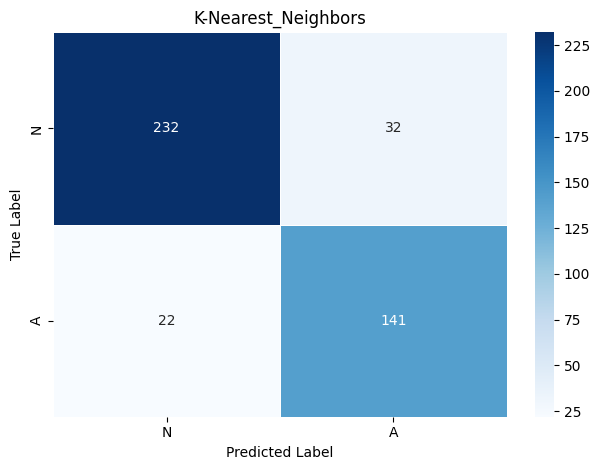

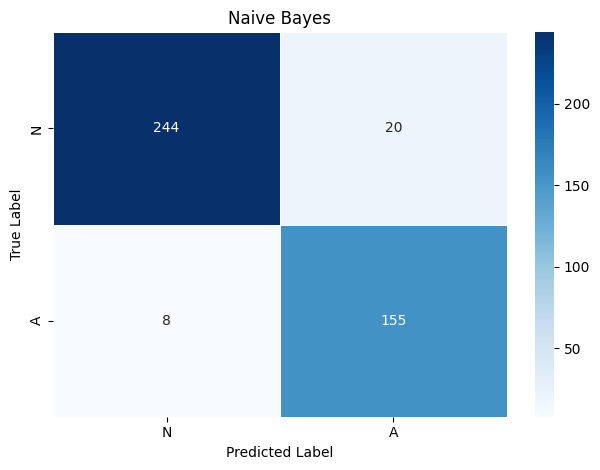

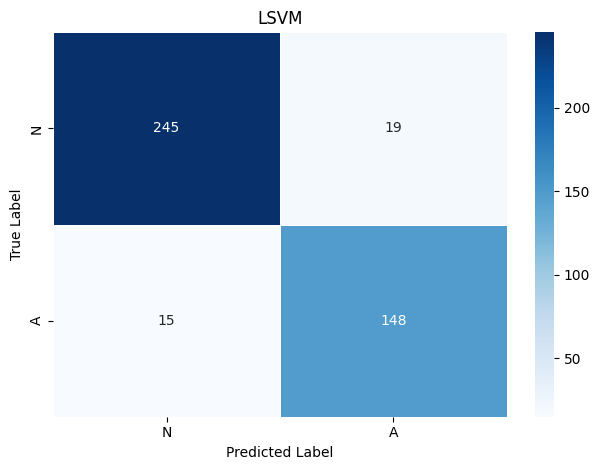

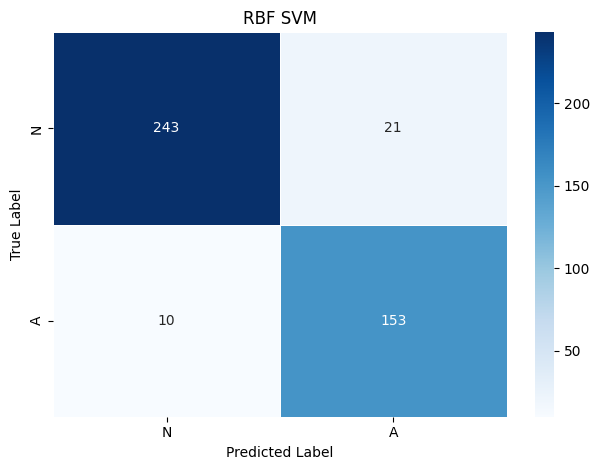

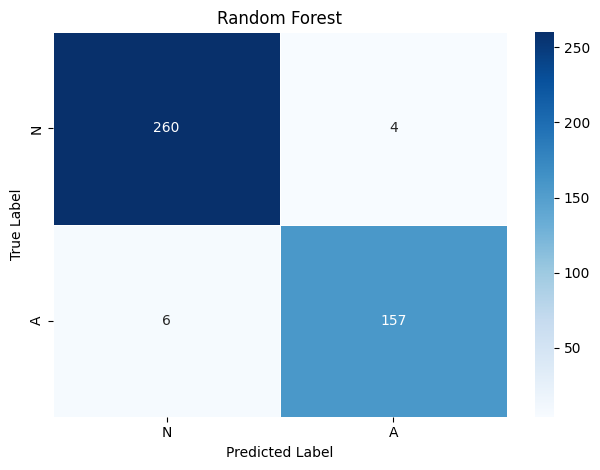

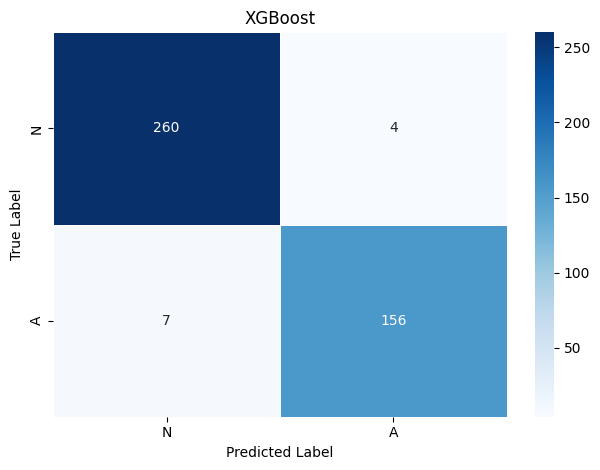

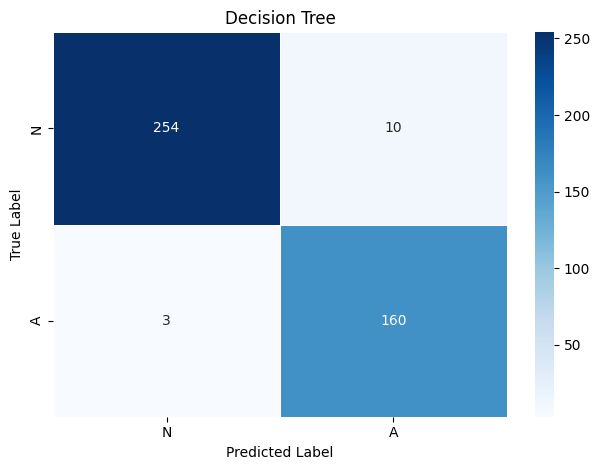

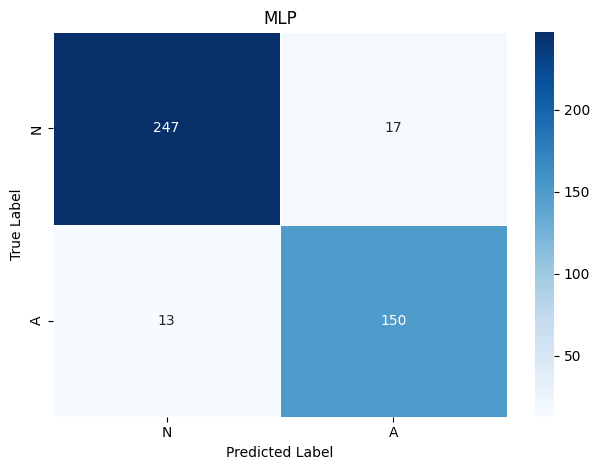

In [ ]:
for model_name,model in AllModels:
    
    #Get Model
    filtered_df_first_row = results_df[results_df["Model"] == model_name].iloc[0]

    #CM
    filtered_CM = filtered_df_first_row["CM"]
    
    #Draw
    sns.heatmap(filtered_CM,annot=True,cmap="Blues",linewidths=0.5,fmt="d",xticklabels=["N", "A"], yticklabels=["N", "A"])
    plt.title(f"{model_name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.tight_layout()
    plt.show()

In [ ]:
#CreateArray
results_mean = {"Model":[],"F1 Score":[],"Precision":[],"Recall":[],"Accuracy":[]}

for model_name,model in AllModels:
    #Models Groupby
    filtered_df = results_df[results_df["Model"] == model_name]

    #Drop Model Fold
    filtered_df = filtered_df.drop(columns=["Model"])
    filtered_df = filtered_df.drop(columns=["Fold"])
    filtered_df = filtered_df.drop(columns=["CM"])

    #Calculate Mean
    mean_values = filtered_df.mean()

    #Add 
    results_mean["Model"].append(model_name)
    results_mean["F1 Score"].append(mean_values["F1 Score"])
    results_mean["Accuracy"].append(mean_values["Accuracy"])
    results_mean["Recall"].append(mean_values["Recall"])
    results_mean["Precision"].append(mean_values["Precision"])

    
#Create Dataframe
results_df_mean = pd.DataFrame(results_mean,columns=["Model","F1 Score","Precision","Recall","Accuracy"])

#Draw
print("Models Mean Table")
print("----------------------------------------------------------")
print(results_df_mean.to_string())


Models Mean Table
----------------------------------------------------------
                 Model  F1 Score  Precision    Recall  Accuracy
0  K-Nearest_Neighbors  0.904903   0.904220  0.905876  0.881944
1          Naive Bayes  0.946125   0.940003  0.952620  0.933240
2                 LSVM  0.933108   0.932547  0.933929  0.916842
3              RBF SVM  0.949845   0.943208  0.956779  0.938161
4        Random Forest  0.984656   0.988148  0.981240  0.980792
5              XGBoost  0.988196   0.991781  0.984663  0.985244
6        Decision Tree  0.981563   0.980306  0.982885  0.977281
7                  MLP  0.947733   0.949250  0.946405  0.934882


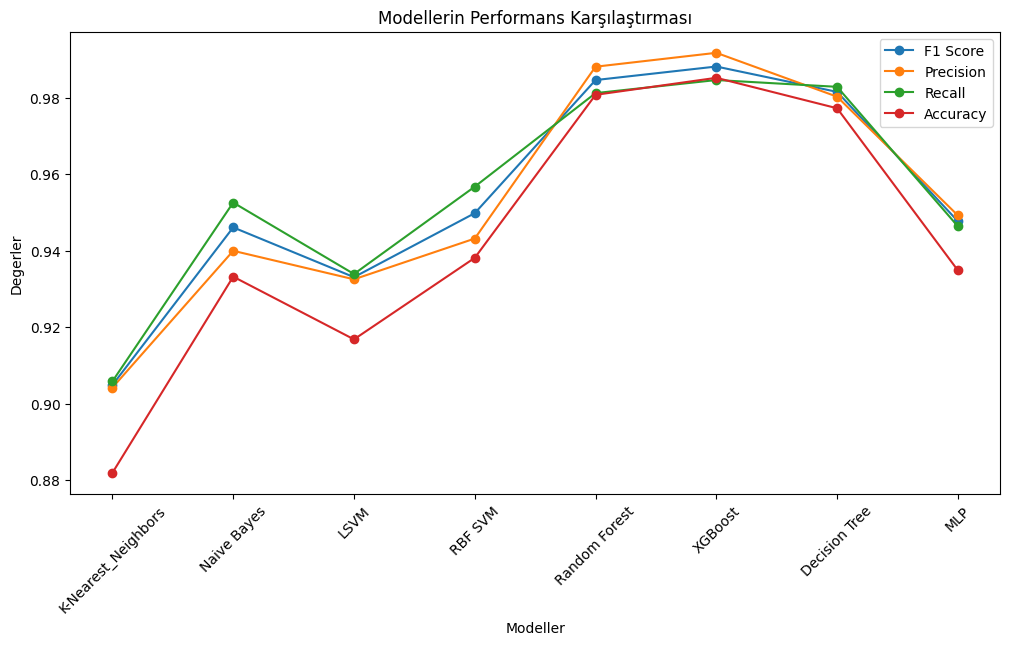

In [ ]:
plt.figure(figsize=(12, 6))
for metric in ["F1 Score", "Precision", "Recall", "Accuracy"]:
    plt.plot(results_df_mean["Model"], results_df_mean[metric], marker='o',label=metric)

#Draw
plt.title('Modellerin Performans Karşılaştırması')
plt.xlabel('Modeller')
plt.ylabel('Degerler')
plt.legend()
plt.xticks(rotation=45)
plt.show()

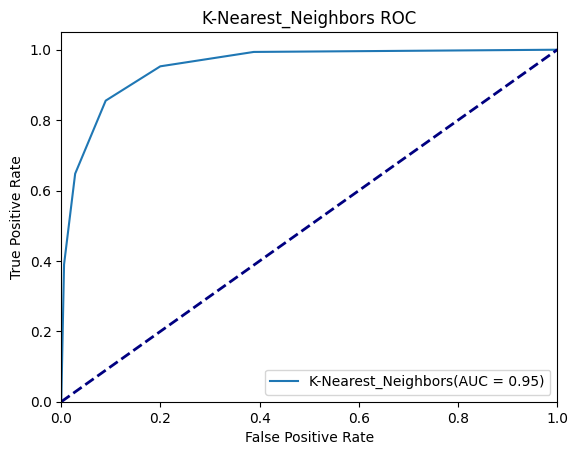

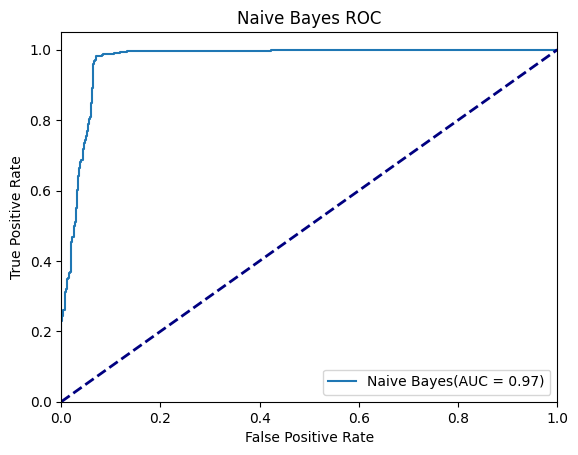

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


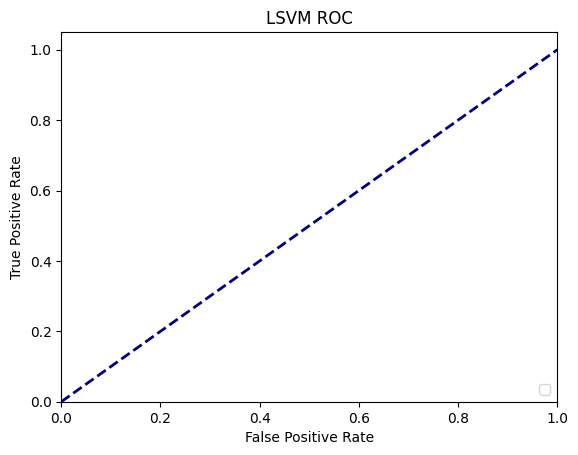

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


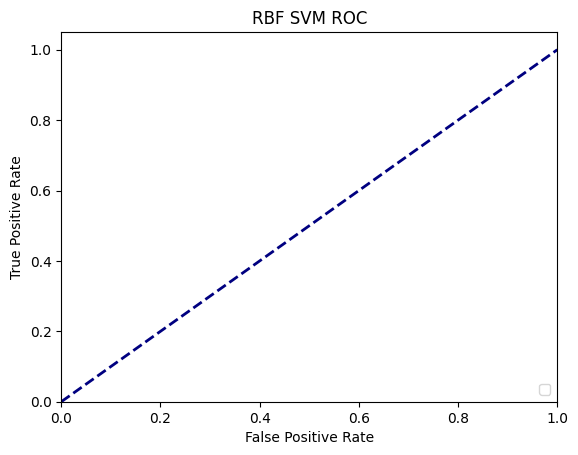

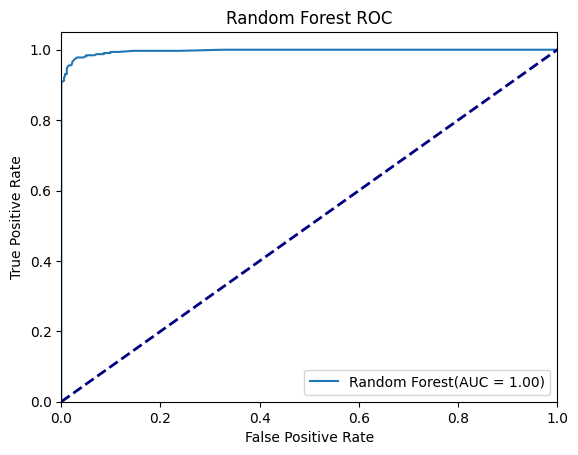

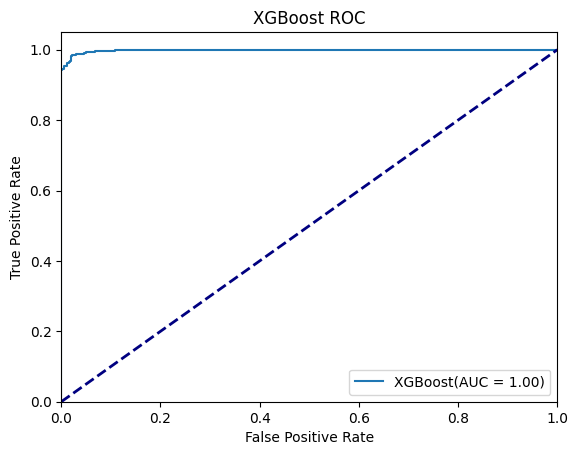

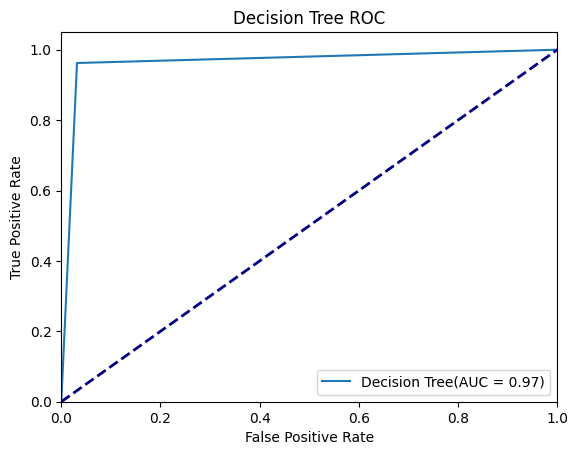

/shared-libs/python3.10/py/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


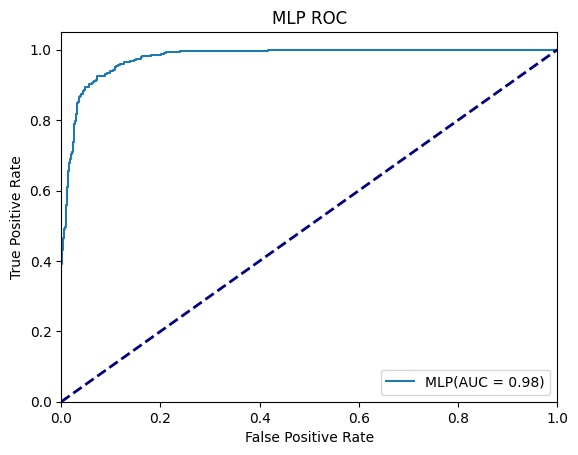

In [ ]:
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_scaled = scaler.fit_transform(X_train_c)
X_test_scaled = scaler.fit_transform(X_test_c)

for model_name,model in AllModels:
 
    if hasattr(model, "predict_proba"): 
        
        model.fit(X_train_scaled, y_train_c)
        y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
        fpr, tpr, _ = roc_curve(y_test_c, y_pred_proba,pos_label=1)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{model_name}(AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} ROC')
    plt.legend(loc="lower right")
    plt.show()

    

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=165a3299-7890-44f0-bb35-567cd132e2bd' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>